# Exercise 9

## Task 1: Toy Problem: Palindrome Numbers

### Question 1.1

- $W_{hx}$ denotes the **input-to-hidden** weight matrix,
- $W_{hh}$ is the **hidden-to-hidden** (or recurrent) weight matrix,
- $W_{ph}$ represents the **hidden-to-output** weight matrix and the $b_h$ and $b_p$ vectors denote the biases.

Given:

$$
\begin{aligned}
&\mathbf{h}^{(t)}=\tanh(\mathbf{W}_{hx}\mathbf{x}^{(t)}+\mathbf{W}_{hh}\mathbf{h}^{(t-1)}+\mathbf{b}_{h})\\
&\mathbf{p}^{(t)}=\mathbf{W}_{ph}\mathbf{h}^{(t)}+\mathbf{b}_p \\
&\mathcal{L}=-\sum_{k=1}^K\mathbf{y}_k\log\hat{\mathbf{y}}_k
\end{aligned}
$$

We can fist assume that $y^{(t)}$ is the softmax of $p^{(t)}$:
$$
y^{(t)} = \text{softmax}{(p^{(t)})}
$$

Also, The gradient of the loss with respect to $p^{(t)}$ is:

$$\frac{\partial\mathcal{L}}{\partial\mathbf{p}^{(t)}}=\hat{\mathbf{y}}-\mathbf{y}$$

Compute the gradient of $p^{(t)}$ w.r.t. $\mathbf{W}_{ph}$:

$$
\mathbf{p}^{(t)}=\mathbf{W}_{ph}\mathbf{h}^{(t)}+\mathbf{b}_p
\implies \frac{\partial\mathbf{p}^{(t)}}{\partial\mathbf{W}_{ph}}=\mathbf{h}^{(t)}
$$

Applying the chain rule we get:

$$
\begin{aligned}
&\frac{\partial\mathcal{L}}{\partial\mathbf{W}_{ph}}=\frac{\partial\mathcal{L}}{\partial\mathbf{p}^{(t)}}\cdot\frac{\partial\mathbf{p}^{(t)}}{\partial\mathbf{W}_{ph}} \\
&\implies \frac{\partial\mathcal{L}}{\partial\mathbf{W}_{ph}}=(\hat{\mathbf{y}}-\mathbf{y})\cdot\mathbf{h}^{(t)} \\
&\implies \frac{\partial\mathcal{L}}{\partial\mathbf{W}_{ph}}=\sum_{t=1}^T(\hat{\mathbf{y}}^{(t)}-\mathbf{y}^{(t)})(\mathbf{h}^{(t)})^T
\end{aligned}
$$



Let us repeat this for $\mathbf{W}_{hh}$:

We can fist assume that $y^{(t)}$ is the softmax of $p^{(t)}$:
$$
y^{(t)} = \text{softmax}{(p^{(t)})}
$$

Also, The gradient of the loss with respect to $p^{(t)}$ is:

$$\frac{\partial\mathcal{L}}{\partial\mathbf{p}^{(t)}}=\hat{\mathbf{y}}-\mathbf{y}$$

Compute the gradient of $p^{(t)}$ w.r.t. $\mathbf{h}^{(t)}$:

$$
\frac{\partial\mathbf{p}^{(t)}}{\partial\mathbf{h}^{(t)}}=\mathbf{W}_{ph}
$$

Applying the chain rule we get:

$$
\begin{aligned}
\frac{\partial\mathcal{L}}{\partial\mathbf{h}^{(t)}}=\frac{\partial\mathcal{L}}{\partial\mathbf{p}^{(t)}}\cdot\frac{\partial\mathbf{p}^{(t)}}{\partial\mathbf{h}^{(t)}}=(\hat{\mathbf{y}}^{(t)}-\mathbf{y}^{(t)})\mathbf{W}_{ph}
\end{aligned}
$$

We can now backpropagate through the tanh non-linearity:

$$
\begin{aligned}
&\mathbf{z}^{(t)}=\mathbf{W}_{hx}\mathbf{x}^{(t)}+\mathbf{W}_{hh}\mathbf{h}^{(t-1)}+\mathbf{b}_h\\
&\mathbf{h}^{(t)}=\tanh(\mathbf{z}^{(t)})\\
&\implies\frac{\partial\mathbf{h}^{(t)}}{\partial\mathbf{z}^{(t)}}=\operatorname{diag}(1-\mathbf{h}^{(t)}\circ\mathbf{h}^{(t)})
\end{aligned}
$$

∘ denotes the Hadamard (element-wise) product

Compute the gradient of the loss w.r.t. $z^{(t)}$:

$$
\begin{aligned}
&\frac{\partial\mathcal{L}}{\partial\mathbf{z}^{(t)}}=\frac{\partial\mathcal{L}}{\partial\mathbf{h}^{(t)}}\cdot\frac{\partial\mathbf{h}^{(t)}}{\partial\mathbf{z}^{(t)}}\\&=(\hat{\mathbf{y}}^{(t)}-\mathbf{y}^{(t)})\mathbf{W}_{ph}\cdot\mathrm{diag}(1-\mathbf{h}^{(t)}\circ\mathbf{h}^{(t)})\\
&\implies \frac{\partial\mathbf{z}^{(t)}}{\partial\mathbf{W}_{hh}}=\mathbf{h}^{(t-1)}
\end{aligned}
$$

Apply the chain rule to get the gradient of the loss with respect to $\mathbf{W}_{hh}$:

$$\frac{\partial\mathcal{L}}{\partial\mathbf{W}_{hh}}=\sum_{t=1}^T\frac{\partial\mathcal{L}}{\partial\mathbf{z}^{(t)}}\cdot\frac{\partial\mathbf{z}^{(t)}}{\partial\mathbf{W}_{hh}}$$

Substitution by computed gradients:

$$
\frac{\partial\mathcal{L}}{\partial\mathbf{W}_{hh}}=
\sum_{t=1}^T
[(\hat{\mathbf{y}}^{(t)}-\mathbf{y}^{(t)})\mathbf{W}_{ph}\cdot\mathrm{diag}(1-\mathbf{h}^{(t)}\circ\mathbf{h}^{(t)})]
\cdot
\mathbf{h}^{(t-1)}
$$

The gradient $\frac{\partial\mathcal{L}}{\partial\mathbf{W}_{hh}}$ has a temporal dependency that accumulates over the entire sequence, unlike $\frac{\partial\mathcal{L}}{\partial\mathbf{W}_{ph}}$ which depends only on the current time step. This temporal dependency can lead to vanishing or exploding gradients, making it challenging to train RNNs effectively for long sequences. This necessitates techniques like gradient clipping, and specialized architecture like **LSTMs** to address these issues.

In [1]:
from part1.dataset import PalindromeDataset
from part1.train import train
from torch.utils.data import DataLoader

### Question 1.2

In [2]:
class Config:
    def __init__(self):
        self.model_type = "RNN"
        self.input_length = 5
        self.input_dim = 1
        self.num_classes = 10
        self.num_hidden = 128
        self.batch_size = 128
        self.learning_rate = 0.001
        self.train_steps = 10000
        self.max_norm = 10.0
        self.device = "mps"

config = Config()


In [3]:
model, _, _= train(config, verbosity=True)

/Users/flyboy/Documents/LMU/SoSe 25/GenAI/Exercise9/part1/train.py:101: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)


[2024-06-28 08:58] Train Step 0000/10000, Batch Size = 128, Examples/Sec = 552.81, Accuracy = 0.13, Loss = 20.599
[2024-06-28 08:58] Train Step 0010/10000, Batch Size = 128, Examples/Sec = 13380.63, Accuracy = 0.16, Loss = 10.547
[2024-06-28 08:58] Train Step 0020/10000, Batch Size = 128, Examples/Sec = 13727.91, Accuracy = 0.10, Loss = 9.434
[2024-06-28 08:58] Train Step 0030/10000, Batch Size = 128, Examples/Sec = 11652.36, Accuracy = 0.14, Loss = 8.539
[2024-06-28 08:58] Train Step 0040/10000, Batch Size = 128, Examples/Sec = 10143.42, Accuracy = 0.15, Loss = 7.898
[2024-06-28 08:58] Train Step 0050/10000, Batch Size = 128, Examples/Sec = 12003.28, Accuracy = 0.18, Loss = 7.948
[2024-06-28 08:58] Train Step 0060/10000, Batch Size = 128, Examples/Sec = 13341.39, Accuracy = 0.25, Loss = 6.058
[2024-06-28 08:58] Train Step 0070/10000, Batch Size = 128, Examples/Sec = 13531.72, Accuracy = 0.23, Loss = 5.621
[2024-06-28 08:58] Train Step 0080/10000, Batch Size = 128, Examples/Sec = 13800

Here's 128 examples to make sure it actually worked.

In [4]:
dataset = PalindromeDataset(6)
data_loader = DataLoader(dataset, 128)

for x, y in data_loader:
    x = x.unsqueeze(-1)
    preds = model(x.to("mps"))
    results = tuple(zip(x, y, preds.argmax(-1)))
    
    break

for x, y, pred in results:
    print(f"{[int(x) for x in x.flatten().tolist()]}, "
        + f"prediction = {pred.item()}, "
        + f"groud truth = {y.item()}")

[2, 1, 0, 0, 1], prediction = 2, groud truth = 2
[6, 4, 1, 1, 4], prediction = 6, groud truth = 6
[4, 0, 5, 5, 0], prediction = 4, groud truth = 4
[7, 0, 0, 0, 0], prediction = 7, groud truth = 7
[8, 4, 0, 0, 4], prediction = 8, groud truth = 8
[2, 2, 2, 2, 2], prediction = 2, groud truth = 2
[7, 7, 3, 3, 7], prediction = 7, groud truth = 7
[4, 9, 3, 3, 9], prediction = 4, groud truth = 4
[9, 4, 0, 0, 4], prediction = 9, groud truth = 9
[0, 7, 1, 1, 7], prediction = 0, groud truth = 0
[7, 5, 7, 7, 5], prediction = 7, groud truth = 7
[4, 4, 0, 0, 4], prediction = 4, groud truth = 4
[9, 5, 4, 4, 5], prediction = 9, groud truth = 9
[3, 1, 0, 0, 1], prediction = 3, groud truth = 3
[9, 9, 2, 2, 9], prediction = 9, groud truth = 9
[9, 4, 2, 2, 4], prediction = 9, groud truth = 9
[0, 5, 3, 3, 5], prediction = 0, groud truth = 0
[8, 8, 9, 9, 8], prediction = 8, groud truth = 8
[7, 4, 8, 8, 4], prediction = 7, groud truth = 7
[3, 6, 2, 2, 6], prediction = 3, groud truth = 3
[6, 2, 6, 6, 2], pre

Our model is not making that many mistakes, let us now increase $T$.

### Question 1.3

In [5]:
from matplotlib import pyplot as plt

In [6]:
class Config:
    def __init__(self):
        self.model_type = "RNN"
        self.input_length = 5 # Sanity Check
        self.input_dim = 1
        self.num_classes = 10
        self.num_hidden = 128
        self.batch_size = 128
        self.learning_rate = 0.001
        self.train_steps = 10000
        self.max_norm = 10.0
        self.device = "mps"

config = Config()


In [ ]:
config.model_type = "RNN"

range_length = range(5, 10)
accuracies = []
losses = []

for t in range_length:
    config.input_length = t
    
    _, accuracy, loss = train(config)
    print(accuracy, loss)
    accuracies.append(accuracy)
    losses.append(loss)


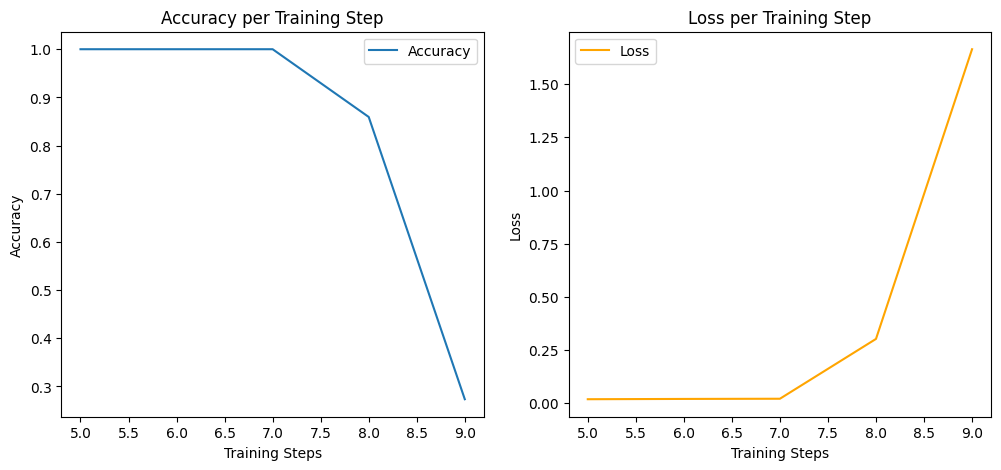

In [11]:

# Plotting accuracies and losses
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range_length, accuracies, label='Accuracy')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy per Training Step')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range_length, losses, label='Loss', color='orange')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss per Training Step')
plt.legend()

plt.show()

### Question 1.4

#### Momentum
With momentum, the update rule incorporates a term for the previous update:

$$v_t=\gamma v_{t-1}+\eta\nabla_\theta J(\theta)$$

$$\theta=\theta-v_t$$

Here, $v_{t-1}$ is the velocity, $\gamma$  is the momentum term (typically between 0.8 and 0.9), and $\eta$ is the learning rate.

Thus, Momentum in optimization helps accelerate gradients vectors in the right directions, leading to faster converging.

This cause:
- *Faster Convergence*: By adding a **fraction of the previous update to the current update**, momentum helps the optimizer gain speed in directions where the gradient consistently points, leading to faster convergence.
- *Smoother Updates*: It **reduces oscillations** and provides smoother updates, especially in areas with steep gradients or noise, by dampening the effects of small, inconsistent gradients

#### Adaptive Learning Rates

With **RMSProp**, we keep a moving average of the squared gradients and scales the learning rate by dividing by the root of this average:

$$\begin{aligned}E[g^2]_t&=\gamma E[g^2]_{t-1}+(1-\gamma)g_t^2\\theta&=\theta-\frac\eta{\sqrt{E[g^2]_t+\epsilon}}g_t\end{aligned}$$
Here, $E[g^2]_t$ is the moving average of squared gradients, $\gamma$ is the decay term, and $\epsilon$ is a small constant to prevent division by zero.

With **RMSProp**, we combine the benefits of both momentum and RMSProp by computing adaptive learning rates for each parameter:

$$\begin{gathered}
\text{r} n_t=\beta_1m_{t-1}+(1-\beta_1)g_t \\
v_t=\beta_2v_{t-1}+(1-\beta_2)g_t^2 \\
\hat{m}_t=\frac{m_t}{1-\beta_1^t} \\
\hat{v}_t=\frac{v_t}{1-\beta_2^t} \\
\theta=\theta-\frac{\eta\hat{m}_t}{\sqrt{\hat{v}_t}+\epsilon} 
\end{gathered}$$

Here, $m_t$ and $v_t$ are the estimates of the first and second moments, respectively, $\beta_1$ and $\beta_2$ are decay rates for these moments, and $\hat{m}_t$ and $\hat{v}_t$ are bias-corrected estimates.

Thus, methods with Adaptive Learning Rates are more efficient and ensure a stable convergence, especially in problems with sparse data or varying gradients.


### Question 1.5

#### a ) Gates explained


- **input modulation** gate $g^(t)$: Uses tanh to generate candidate values for updating the cell state, ensuring values are within a manageable range. Responsible for generating new candidate values that could be added to the cell state.

Non-linearity due to **tanh**.

Good choice because: The tanh function outputs values between -1 and 1, which helps in normalizing the candidate values and ensures that the updates to the cell state are kept within a manageable range. This helps prevent the cell state from growing too large or too small, which could lead to issues such as exploding or vanishing gradients. Thus we do not need to clip the gradients anymore.

- **input** gate $i^(t)$: Uses sigmoid to control the extent to which new information updates the cell state. Decides which values we’ll update. What new information we learn.
> what new information we’re going to store in the cell state.

Non-linearity due to **sigmoid**.

Good choice because: The sigmoid function outputs values between 0 and 1, which makes it suitable for gating purposes. This allows the model to determine the extent to which new information should be added to the cell state. By using the sigmoid function, the LSTM can scale the influence of the candidate values on the cell state, effectively controlling the flow of new information into the cell.


- **forget** gate $f^(t)$: Uses sigmoid to decide how much of the previous cell state should be retained. Decide what information we’re going to throw away from the cell state.
> It looks at $h_{t−1}$ and $x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t−1}$. A 1 represents “completely keep this” while a 0 represents “completely get rid of this.”

Non-linearity due to **sigmoid**.

Good choice because: Same than for input gate but the other way around this time. The sigmoid function is used here because it outputs values between 0 and 1. This allows the model to scale the previous cell state, effectively "forgetting" parts of it by multiplying by values close to 0 and "retaining" parts of it by multiplying by values close to 1. This selective forgetting is crucial for managing the long-term dependencies and avoiding the issue of vanishing gradients.

- and **output** gate $o^(t)$: Uses sigmoid to regulate the information passed to the hidden state, with tanh applied to the cell state for normalization. Decides which values we’ll update.
> output will be based on our cell state, but will be a filtered version. [...]   we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

Non-linearity due to  **sigmoid** and **tanh**.

Good choice because: 
- **sigmoid** function in the output gate allows the model to decide how much of the cell state should influence the hidden state. The hidden state is the output of the LSTM cell at each time step, and by gating this output, the model can regulate the flow of information to the next layer or next time step.
- **tanh** function is applied to the cell state before multiplying it by the output gate. This ensures that the output values are normalized between -1 and 1, which helps in maintaining the stability of the gradients and provides a bounded output range.


#### b ) Total number of parameters

**Weights** for the Gates

There is 2 types of gates:
- connecting the hidden states of dimension $(n, n)$
- connecting the inputs to the gates of dimension $(d, n)$

For each we have dimension $n^2 + d\times n$, thus for all: $4\times (n^2 + d\times n)$

**Biases**

Each gate has its own bias vector, which has dimensions $n$. Thus, $4*n$ biases for all.

**Total**

$$4 \times (n^2 + d \times n + n)$$

In [7]:
config.model_type = "LSTM"
config.input_length = 5 # Sanity Check
config.train_steps = 50

train(config, verbosity=True)

/Users/flyboy/Documents/LMU/SoSe 25/GenAI/Exercise9/part1/train.py:101: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)


[2024-06-28 07:41] Train Step 0000/0050, Batch Size = 128, Examples/Sec = 1915.25, Accuracy = 0.08, Loss = 7.660
[2024-06-28 07:41] Train Step 0010/0050, Batch Size = 128, Examples/Sec = 4583.00, Accuracy = 0.25, Loss = 2.851
[2024-06-28 07:41] Train Step 0020/0050, Batch Size = 128, Examples/Sec = 4246.56, Accuracy = 0.35, Loss = 1.891
[2024-06-28 07:41] Train Step 0030/0050, Batch Size = 128, Examples/Sec = 4168.19, Accuracy = 0.45, Loss = 1.666
[2024-06-28 07:41] Train Step 0040/0050, Batch Size = 128, Examples/Sec = 4223.34, Accuracy = 0.52, Loss = 1.449
[2024-06-28 07:41] Train Step 0050/0050, Batch Size = 128, Examples/Sec = 3239.69, Accuracy = 0.55, Loss = 1.195
Done training.


(LSTM(), 0.546875, 1.1951243877410889)

In [8]:
config.model_type = "LSTM"
config.input_length = 5 # Sanity Check
config.train_steps = 50

train(config, verbosity=True)

[2024-06-28 07:42] Train Step 0000/0050, Batch Size = 128, Examples/Sec = 2349.36, Accuracy = 0.09, Loss = 6.751
[2024-06-28 07:42] Train Step 0010/0050, Batch Size = 128, Examples/Sec = 4353.76, Accuracy = 0.26, Loss = 3.044
[2024-06-28 07:42] Train Step 0020/0050, Batch Size = 128, Examples/Sec = 4537.10, Accuracy = 0.29, Loss = 2.108
[2024-06-28 07:42] Train Step 0030/0050, Batch Size = 128, Examples/Sec = 4618.44, Accuracy = 0.40, Loss = 1.753
[2024-06-28 07:42] Train Step 0040/0050, Batch Size = 128, Examples/Sec = 4134.26, Accuracy = 0.45, Loss = 1.571
[2024-06-28 07:42] Train Step 0050/0050, Batch Size = 128, Examples/Sec = 4655.61, Accuracy = 0.45, Loss = 1.513
Done training.


(LSTM(), 0.4453125, 1.5130856037139893)

In [9]:
config.model_type = "LSTM"
config.train_steps = 10000

range_length = range(5, 10)
accuracies = []
losses = []

for t in range_length:
    config.input_length = t
    
    _, accuracy, loss = train(config)
    print(accuracy, loss)
    accuracies.append(accuracy)
    losses.append(loss)


Done training.
1.0 7.105978170329763e-07
Done training.
1.0 5.794614025944611e-06
Done training.
1.0 0.00011121592251583934
Done training.
1.0 0.0024377526715397835
Done training.
1.0 0.0003996348532382399


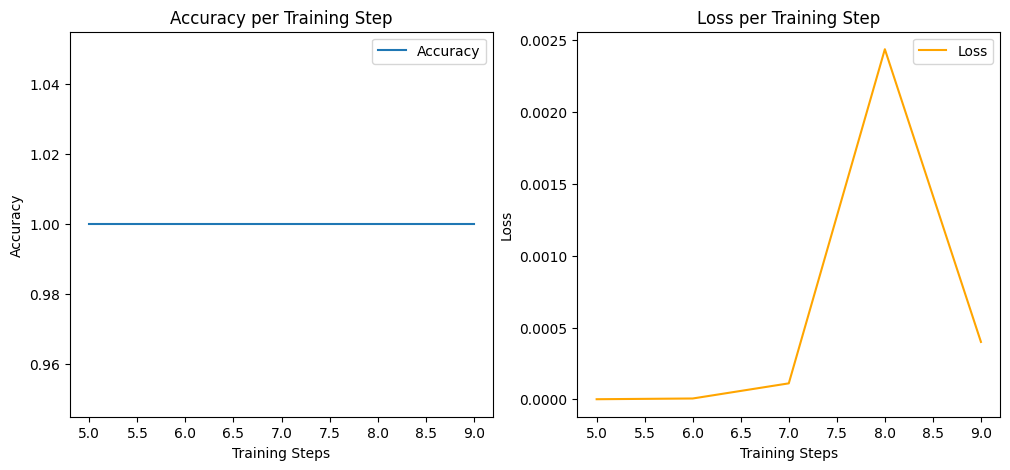

In [10]:

# Plotting accuracies and losses
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range_length, accuracies, label='Accuracy')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy per Training Step')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range_length, losses, label='Loss', color='orange')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Loss per Training Step')
plt.legend()

plt.show()

We can attest by the graph above that the LSTM is performing much better in retaining long term dependencies.